In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict
from IPython.display import Image

In [222]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [223]:
def standardize(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_stand = (x - x_mean) / x_std
    return x_stand

x_initial = x
y_initial = y

x = standardize(x)
y = standardize(y)

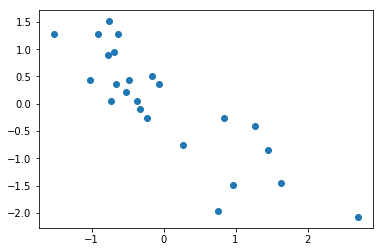

In [224]:
plt.scatter(x, y)

In [225]:
theta = predict.get_params()
print(theta)

[[ -2.14489633e-02]
 [  8.49959962e+03]]


Pour pouvoir multiplier les matrices X et theta, on ajoute une colonne de 1 à X, ainsi on obtient:

$X = \begin{bmatrix} x^{(1)} & 1 \\ ... & ...\\x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ 

In [226]:
X = np.hstack((x, np.ones(x.shape)))

In [227]:
y = y.reshape(y.shape[0],1)

## Implémantation du modèle Linéaire
On implémente un modèle de la forme $F = X.\theta$

In [228]:
def model(X, theta):
    return X.dot(theta)

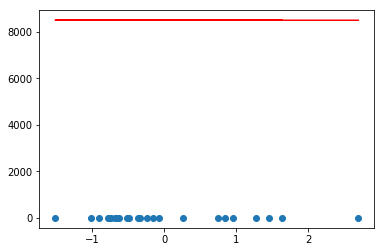

In [229]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## Equation de la fonction coût :

## $ J(\theta) = \frac{1}{2m} \sum_{i=1}^m-1
(X.\theta - y)^2 $

In [230]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [231]:
cost_function(X, y, theta)

36121597.330131717

## Formule du gradient:

## $\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

In [232]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

## Pour calculer la descente de gradient: 

## $\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [233]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Phase d'entrainement:

In [234]:
learning_rate=0.01
n_iterations=1800
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

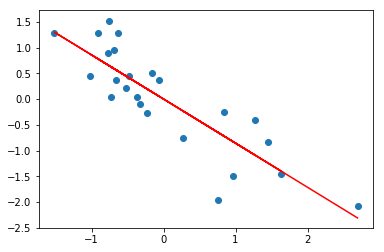

In [235]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Courbe d'apprentissage

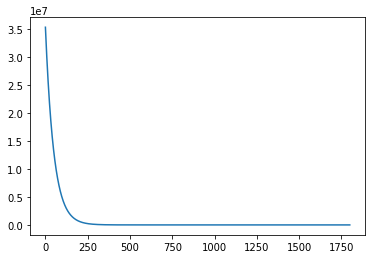

In [236]:
plt.plot(range(n_iterations), cost_history)

# Evaluation de la performance du modèle
 Plus le résultat est proche de 1, plus le modele est performant

In [237]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [238]:
coef_determination(y, predictions)

0.73297469385180802

## Pour trouver les  valeurs de a et b par la methode des moindres  carrés, il faut résoudre l' équation suivante:


## $ S = \sum_{i=0}^m ((y_i - (ax_i + b))^2 $

### On obtient donc :

## $ a = \frac{m \sum x_iy_i  -  \sum x_i \sum y_i}{m \sum x_i^2  -  (\sum x_i)^2} $

## $ b = \frac{1}{m}(\sum y_i - a \sum x_i) $

In [239]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    m = len(x)
    a = (m * xy_sum - x_sum * y_sum) / (m * x2_sum - x_sum**2)
    b = y_sum - a * x_sum / m
    return a, b

In [240]:
a2, b2 = MoindreCarre(x, y)
theta2 = np.array([a2, b2])
predictions2 = model(X, theta2)

In [241]:
coef_determination(y, predictions2)

0.73297470783149654

In [242]:
def destandardize(a, b, xi, yi):
    y_mean = np.mean(yi)
    x_mean = np.mean(xi)
    y_std = np.std(yi)
    x_std = np.std(xi)
    
    a_destand = (y_std * a) / x_std
    div = (a * x_mean) / x_std
    b_destand = y_mean + (y_std * (b - div))
    return a_destand, b_destand

a2 = theta2[0]
b2 = theta2[1]

a = theta_final[0]
b = theta_final[1]

a2_destand, b2_destand = destandardize(a2,  b2, x_initial, y_initial)
a_destand, b_destand = destandardize(a, b, x_initial, y_initial)

print('Par la methode des moindres carré: a= {}, b={}'.format(a2_destand,  b2_destand))
print('Par la methode de descente de gradient: a= {}, b={}'.format(a_destand,  b_destand))

Par la methode des moindres carré: a= [-0.02144896], b=[ 8499.59964993]
Par la methode de descente de gradient: a= [-0.02144896], b=[ 8499.7523656]


In [243]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [244]:
save_theta(float(a_destand), float(b_destand))